In [2]:
import os
import numpy as np
import MDAnalysis as mda
from MDAnalysis.core import groups

In [3]:
res_list = [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 57, 66, 83, 84, 85, 86, 87, 89, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 128, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 185, 186, 187, 188, 189, 190, 192, 307, 308, 312, 605, 607, 608, 610]

## Load trajectorires

In [18]:
import matplotlib.pyplot as plt
from chihhui_PCA import SuperimposePCA2

In [19]:
top_file = '/mnt/Tsunami_HHD/chihhui/3clpro/7tll_modeled/7tll.prmtop'
trj_file = '/mnt/Tsunami_HHD/chihhui/3clpro/7tll_modeled/Output/MD/prod_NPT_1us_autoimage.nc'
traj = mda.Universe(top_file, trj_file)

## Do PCA

In [20]:
### create an empty atomgroup 
chainA = traj.select_atoms('resname not_exsits')

### select atoms in the residue list
for resid in res_list:
    chainA += traj.select_atoms(f'resid {resid} and not type H*')
list(chainA)

[<Atom 237: N of type N of resname MET, resid 17 and segid SYSTEM>,
 <Atom 239: CA of type CX of resname MET, resid 17 and segid SYSTEM>,
 <Atom 241: CB of type 2C of resname MET, resid 17 and segid SYSTEM>,
 <Atom 244: CG of type 2C of resname MET, resid 17 and segid SYSTEM>,
 <Atom 247: SD of type S of resname MET, resid 17 and segid SYSTEM>,
 <Atom 248: CE of type CT of resname MET, resid 17 and segid SYSTEM>,
 <Atom 252: C of type C of resname MET, resid 17 and segid SYSTEM>,
 <Atom 253: O of type O of resname MET, resid 17 and segid SYSTEM>,
 <Atom 254: N of type N of resname VAL, resid 18 and segid SYSTEM>,
 <Atom 256: CA of type CX of resname VAL, resid 18 and segid SYSTEM>,
 <Atom 258: CB of type 3C of resname VAL, resid 18 and segid SYSTEM>,
 <Atom 260: CG1 of type CT of resname VAL, resid 18 and segid SYSTEM>,
 <Atom 264: CG2 of type CT of resname VAL, resid 18 and segid SYSTEM>,
 <Atom 268: C of type C of resname VAL, resid 18 and segid SYSTEM>,
 <Atom 269: O of type O of re

In [21]:
### create an empty atomgroup 
chainB = traj.select_atoms('resname not_exsits')
res_list_B = []
### select atoms in the residue list
for resid in res_list:
    if resid < 307:
        resid += 306
    elif resid >= 307:
        resid -= 306
    else:
        print('something wrong')
        
    res_list_B.append(resid)
for resid in res_list_B:
    chainB += traj.select_atoms(f'resid {resid} and not type H*')
list(chainB)

[<Atom 4923: N of type N of resname MET, resid 323 and segid SYSTEM>,
 <Atom 4925: CA of type CX of resname MET, resid 323 and segid SYSTEM>,
 <Atom 4927: CB of type 2C of resname MET, resid 323 and segid SYSTEM>,
 <Atom 4930: CG of type 2C of resname MET, resid 323 and segid SYSTEM>,
 <Atom 4933: SD of type S of resname MET, resid 323 and segid SYSTEM>,
 <Atom 4934: CE of type CT of resname MET, resid 323 and segid SYSTEM>,
 <Atom 4938: C of type C of resname MET, resid 323 and segid SYSTEM>,
 <Atom 4939: O of type O of resname MET, resid 323 and segid SYSTEM>,
 <Atom 4940: N of type N of resname VAL, resid 324 and segid SYSTEM>,
 <Atom 4942: CA of type CX of resname VAL, resid 324 and segid SYSTEM>,
 <Atom 4944: CB of type 3C of resname VAL, resid 324 and segid SYSTEM>,
 <Atom 4946: CG1 of type CT of resname VAL, resid 324 and segid SYSTEM>,
 <Atom 4950: CG2 of type CT of resname VAL, resid 324 and segid SYSTEM>,
 <Atom 4954: C of type C of resname VAL, resid 324 and segid SYSTEM>,
 

In [22]:
traj_coord = [chainA.positions for frame in chainA.universe.trajectory]   ### chainA
traj_coord += [chainB.positions for frame in chainB.universe.trajectory]   ### chainB
np.array(traj_coord).shape

(20000, 784, 3)

In [ ]:
get_pca = SuperimposePCA2(traj_coord)

In [ ]:
get_pca.superimpose_to_mean()

In [ ]:
get_pca.mean_structure.mean(axis=0)

In [ ]:
from numpy.testing import assert_almost_equal
assert_almost_equal(0, get_pca.mean_structure.mean(axis=0))

In [ ]:
get_pca.eigen_decompose()
pc1_pos, pc2_pos = get_pca.project_to_pc()
pc1_var, pc2_var = get_pca.pc1_var, get_pca.pc2_var
pc1_vec, pc2_vec = get_pca.eigen_vecs[:, 0], get_pca.eigen_vecs[:, 1]
mean_structure = get_pca.mean_structure

In [3]:
import pickle
# save pca results
# dic = {'pc1_pos': pc1_pos, 
#        'pc2_pos': pc2_pos,
#        'pc1_vec': pc1_vec,
#        'pc2_vec': pc2_vec,
#        'pc1_var': pc1_var,
#        'pc2_var': pc2_var,
#        'mean_structure': mean_structure,
#        'flat_pos': get_pca.flat_pos
#       }

# with open('pc_pos.pkl', 'wb') as f:
#     pickle.dump(dic, f)


### read file
with open('pc_pos.pkl', 'rb') as f2:
    dataset = pickle.load(f2)    
    
    
pc1_pos, pc2_pos = dataset['pc1_pos'], dataset['pc2_pos']
pc1_vec, pc2_vec = dataset['pc1_vec'], dataset['pc2_vec']
pc1_var, pc2_var = dataset['pc1_var'], dataset['pc2_var']
mean_structure = dataset['mean_structure']
flat_pos = dataset['flat_pos']

Text(0, 0.5, 'PC2 11.73%')

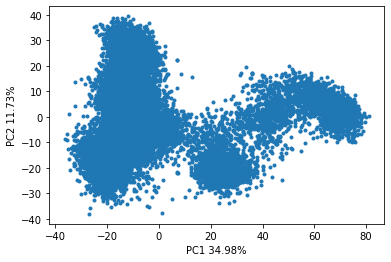

In [9]:
plt.scatter(pc1_pos, pc2_pos, marker='.')
plt.xlabel(f'PC1 {pc1_var*100:.2f}%')
plt.ylabel(f'PC2 {pc2_var*100:.2f}%')

## Clustering (hierarchical, UPGMA)

In [6]:
from silhouette import optimal_n_clustering

In [7]:
data = np.array([pc1_pos, pc2_pos]).T
# data.shape

In [11]:
### data size: (n_samples * n_features)
optimal_n, cluster_ids, Z, silhouette_scores = optimal_n_clustering(data, 2, 10)

### save cluster id in pickle
import pickle
# with open('cluster_ids.pkl', 'wb') as f3:
#     pickle.dump(cluster_ids, f3)
    
### read cluster ids
with open('cluster_ids.pkl', 'rb') as f4:
    cluster_ids = pickle.load(f4)    

### visually check the scores for each n
### [n, score]
# silhouette_scores[:, :2]

The optimal number of clusters is 2, the average silhouette score is 0.6274.


[2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.6274, 0.5316, 0.5431, 0.4676, 0.4637, 0.4249, 0.4787, 0.4465, 0.4308]


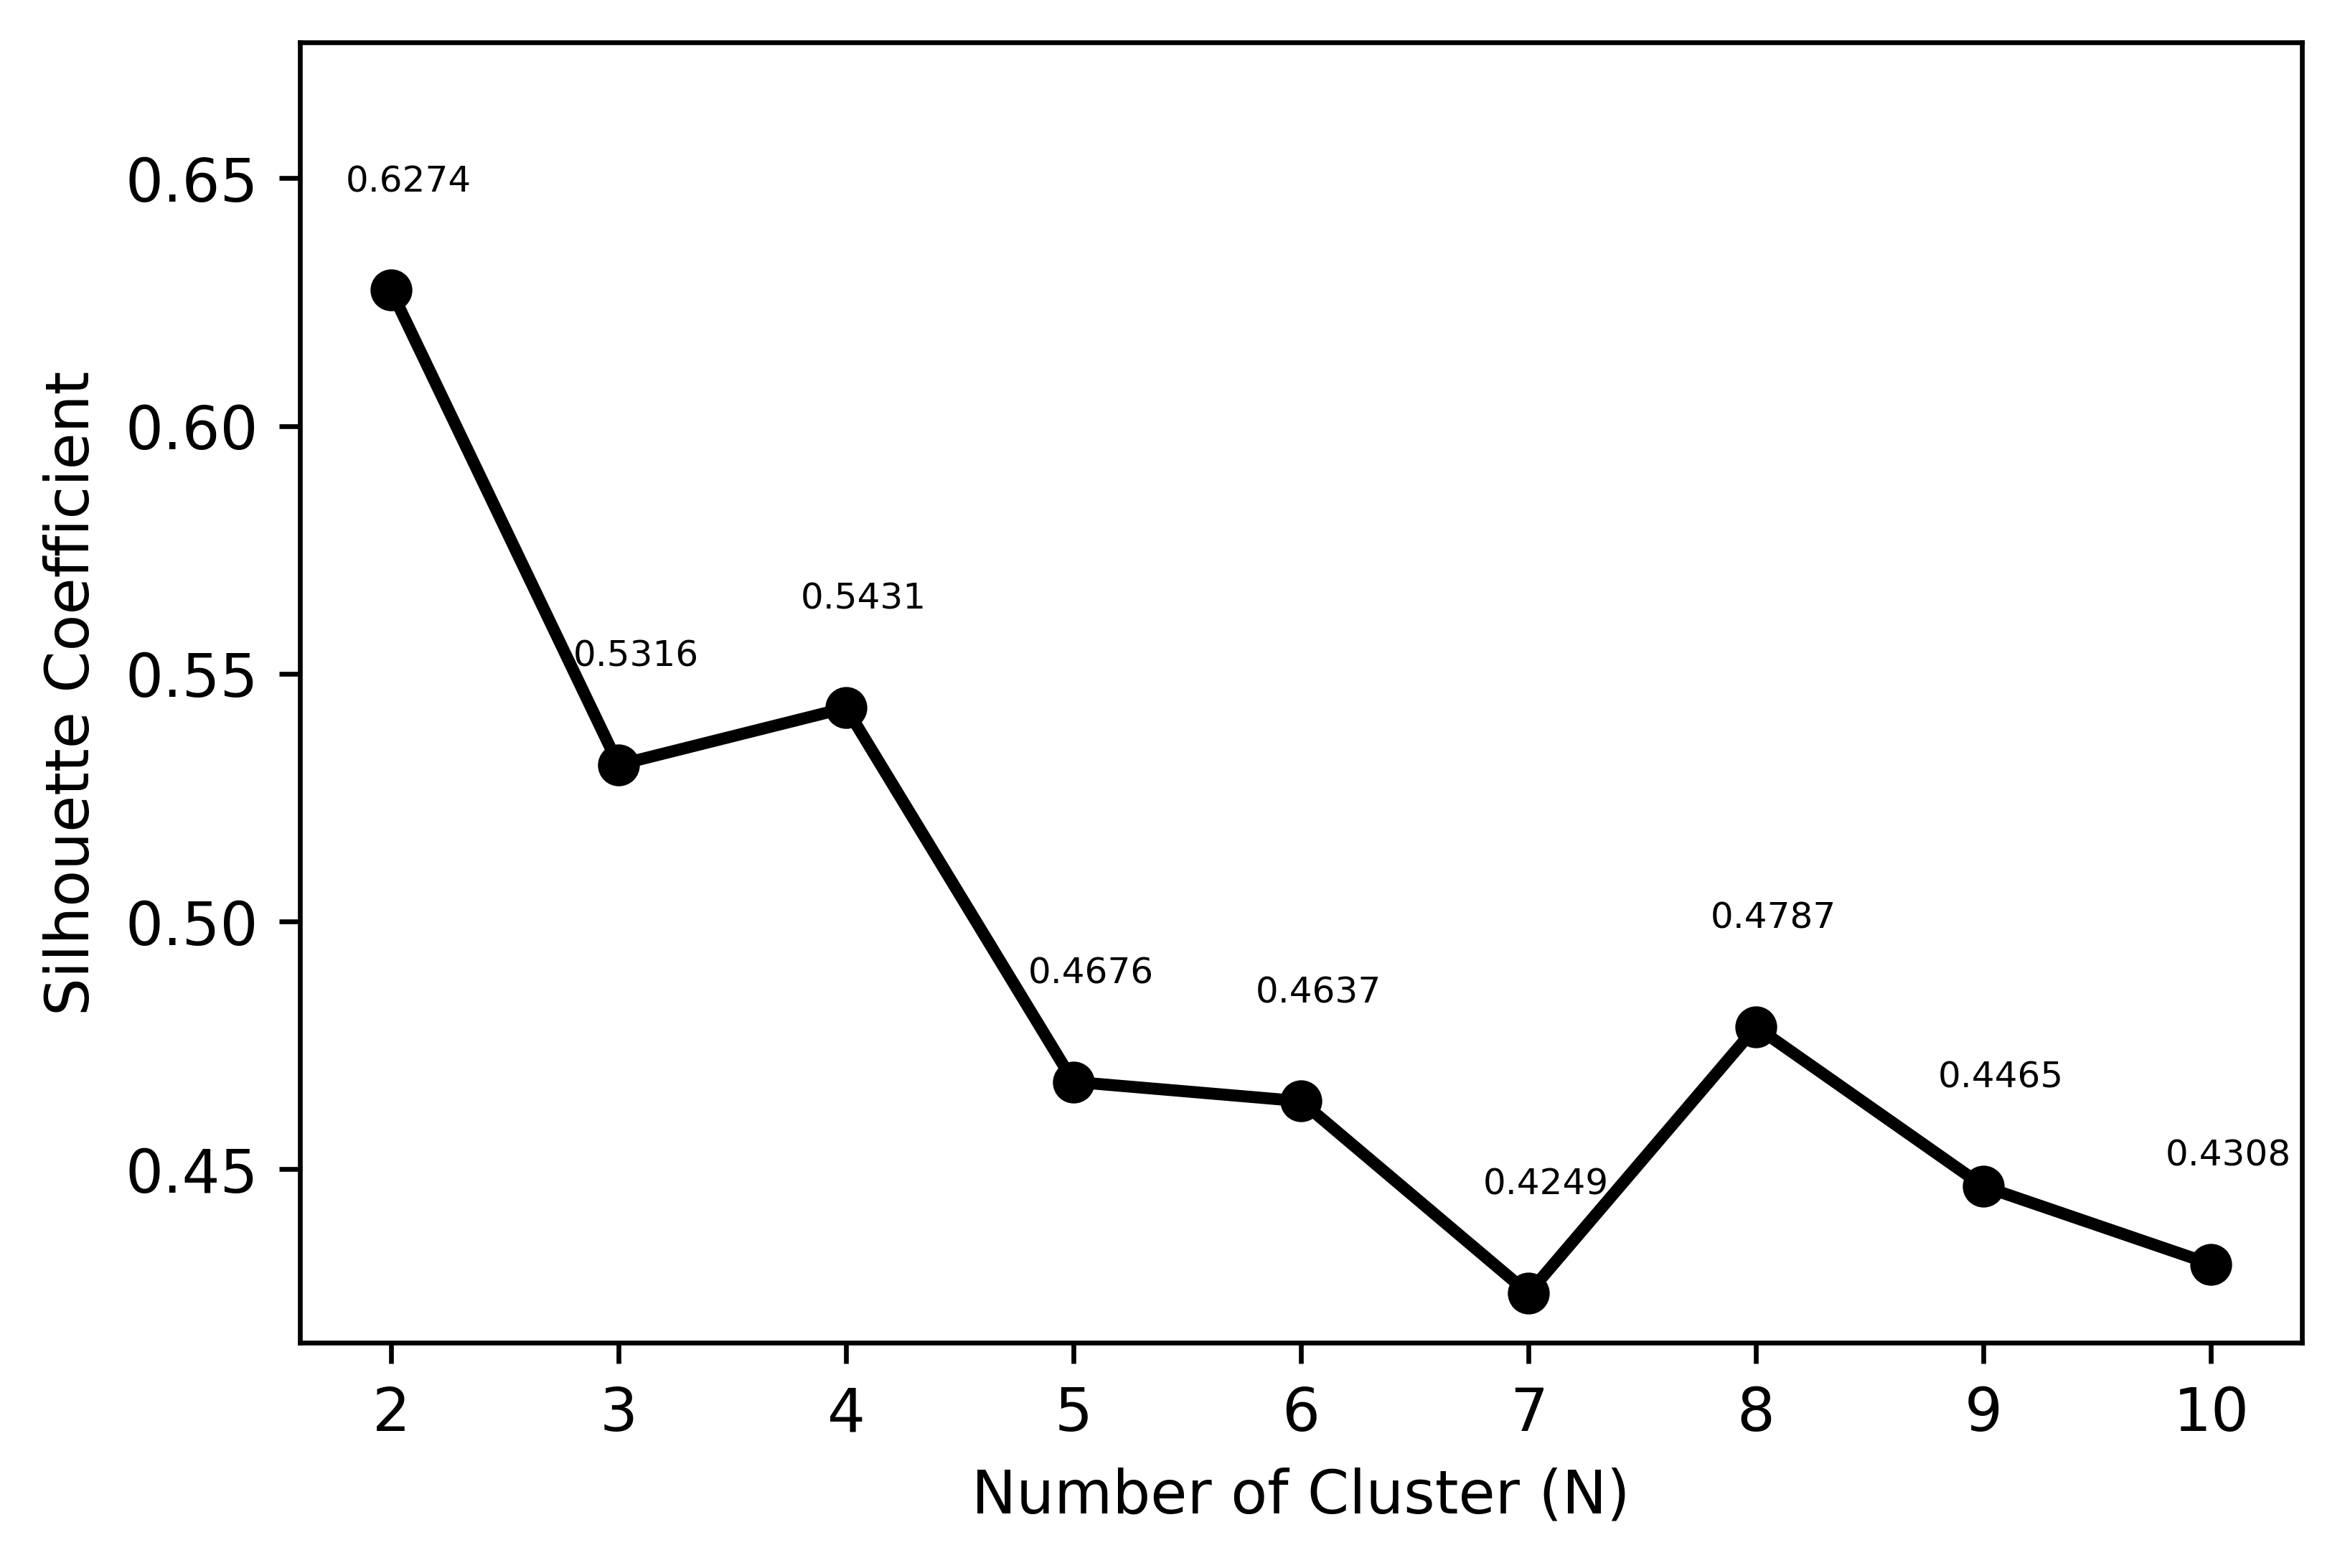

In [12]:
n_clust = [i[0] for i in silhouette_scores[:, :2]]
n_scores = [round(i[1], 4) for i in silhouette_scores[:, :2]]
print(n_clust)
print(n_scores)
plt.figure(dpi=600)
plt.plot(n_clust, n_scores, linewidth="2", linestyle="-", marker="o", color='k')
plt.xlabel('Number of Cluster (N)')
plt.ylabel('Silhouette Coefficient')
plt.ylim(min(n_scores) - 0.01, max(n_scores) + 0.05)

for x, y in zip(n_clust, n_scores):
    # plt.text(f'{y:.4f}', ha='center')
    plt.text(x-0.2, y+0.02, f'{y:.4f}', fontsize=6)

In [17]:
### cluster_ids stores the cluster id for each frame
print(cluster_ids.shape)
### check how many clusers are in the plot
set(cluster_ids)

(20000,)


{1, 2}

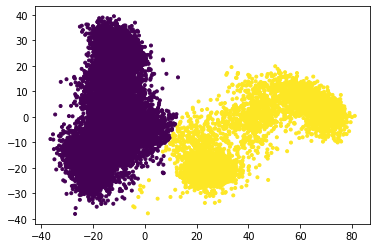

In [11]:
plt.scatter(pc1_pos, pc2_pos,c=cluster_ids, marker='.')

## plot

In [23]:
### Project xray (7tll) structure on to pc1, pc2 ###

mean = np.tile(flat_pos.mean(axis=0), (flat_pos.shape[0], 1))
ref = mda.Universe('/mnt/Tsunami_HHD/chihhui/3clpro/7tll_modeled/7tll_sEM_backbone_200.pdb')

xray_A = ref.select_atoms('resname not_exsits')
for res_id in res_list:
    xray_A += ref.select_atoms(f'resid {res_id} and not type H*')
xray_pos_A = np.array(xray_A.positions)

xray_B = ref.select_atoms('resname not_exsits')
for res_id in res_list_B:
    xray_B += ref.select_atoms(f'resid {res_id} and not type H*')
xray_pos_B = np.array(xray_B.positions)


from chihhui_PCA import superimposition
new_xray_pos_A, RMSD_A = superimposition(mean_structure, xray_pos_A)
new_xray_pos_B, RMSD_B = superimposition(mean_structure, xray_pos_B)
print('rmsd_A:', RMSD_A)
print('rmsd_B:', RMSD_B)

x_7tll_A_pc1 = (new_xray_pos_A.flatten() - mean[0]) @ pc1_vec
x_7tll_A_pc2 = (new_xray_pos_A.flatten() - mean[0]) @ pc2_vec
x_7tll_B_pc1 = (new_xray_pos_B.flatten() - mean[0]) @ pc1_vec
x_7tll_B_pc2 = (new_xray_pos_B.flatten() - mean[0]) @ pc2_vec

rmsd_A: 1.2239373652573928
rmsd_B: 1.2209290095007825


In [24]:
import os
from chihhui_PCA import superimposition

mean = np.tile(flat_pos.mean(axis=0), (flat_pos.shape[0], 1))
file_name = ["7TOB", "7TVX", "7TVS", "8DI3", "8HHU"]
xray_pos_arr = []

for i, structure in enumerate(file_name):
    file_path = os.path.join('/mnt/Tsunami_HHD/chihhui/3clpro/7tll_modeled/Output/PCA/3cl_pdbs', f'{file_name[i].lower()}_pca.pdb')
    print(structure[:4])
    xray_pdb = mda.Universe(file_path)
    xray = xray_pdb.select_atoms('resname not_exsits')
    for res_id in res_list:
        xray += xray_pdb.select_atoms(f'resid {res_id} and not type H*')
        xray_pos = np.array(xray.positions)
    new_xray_pos, RMSD = superimposition(mean_structure, xray_pos)
    print('rmsd:', RMSD)
    xray_pc1 = (new_xray_pos.flatten() - mean[0]) @ pc1_vec
    xray_pc2 = (new_xray_pos.flatten() - mean[0]) @ pc1_vec
    xray_pos_arr.append([xray_pc1, xray_pc2])

7TOB


/home/chihhui/miniconda3/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:334: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/home/chihhui/miniconda3/lib/python3.8/site-packages/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


rmsd: 1.248985480716462
7TVX
rmsd: 1.3518990037736773
7TVS
rmsd: 1.403825398233327
8DI3
rmsd: 1.3108752480222674
8HHU
rmsd: 1.2016103465461694


cluster1: 15762 frames
cluster1_ID:15995
cluster2: 4238 frames
cluster2_ID:15190


Text(0, 0.5, 'PC2 11.73%')

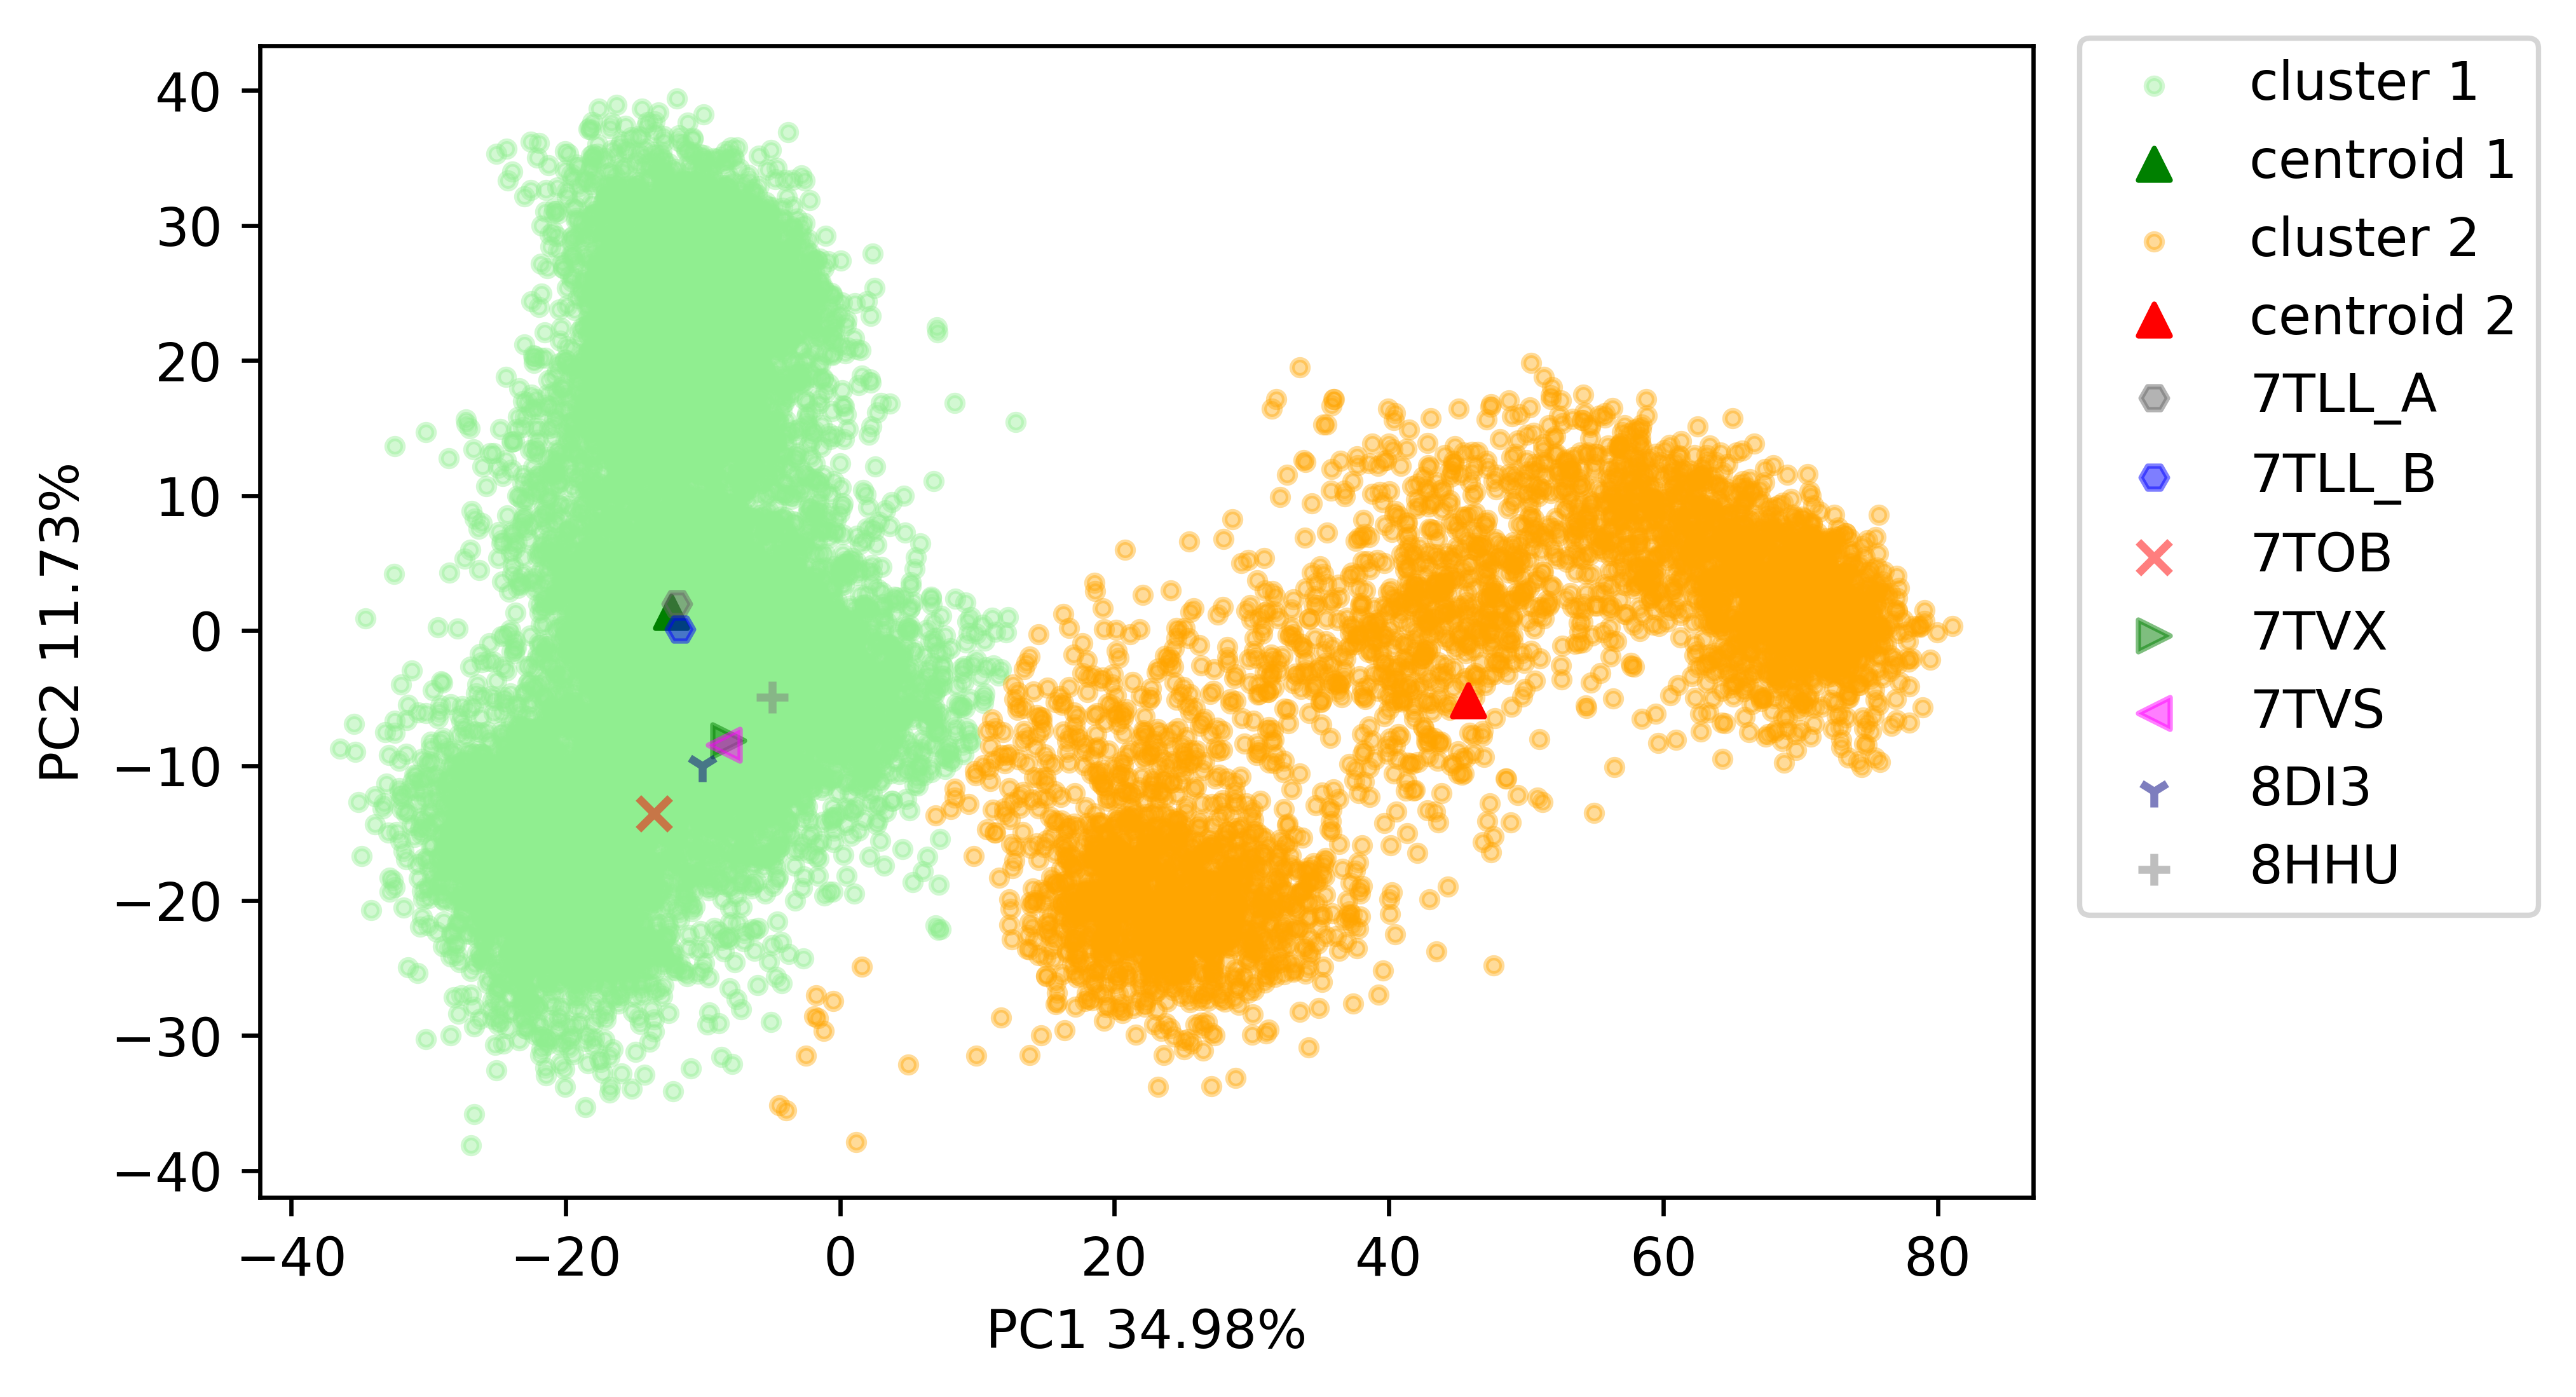

In [45]:
plt.figure(dpi=600)
clusters = [i for i in set(cluster_ids)]
pc_pos = np.array([pc1_pos, pc2_pos])
pc1 = pc1_vec
pc2 = pc2_vec
color_labels = ['lightgreen', 'orange', 'cyan' , 'blue', 'red', 'pink', 'black', 'gray', 'purple', 'green']
center_color = ['green', 'red', 'lightgreen', 'lightblue', 'pink', 'yello', 'gray', 'black', 'blue', 'lightgreen']
legend = []
represent_ids = []

for i in range(len(clusters)):
    ### plot each cluster
    clust_id = clusters[i]
    clust_pos = pc_pos.T[cluster_ids == clust_id]
    print(f'cluster{clust_id}: {clust_pos.shape[0]} frames')
    plt.scatter(clust_pos.T[0], clust_pos.T[1], c=color_labels[i], marker='.', alpha=0.4)
    legend.append(f'cluster {clust_id}')

    ### polt centroid
    mean_pos = clust_pos.mean(axis=0)
    plt.scatter(mean_pos[0], mean_pos[1], marker='^', c=center_color[i])
    legend.append(f'centroid {clust_id}')
    represent_id = np.linalg.norm(pc_pos.T - mean_pos, axis=1).argmin()
    represent_ids.append(represent_id)
    print(f'cluster{clust_id}_ID:{represent_id+1}')
    
# ### plot xray
### 7tll
plt.scatter(x_7tll_A_pc1, x_7tll_A_pc2, marker='H', s=25, color='dimgray', alpha=0.5)
plt.scatter(x_7tll_B_pc1, x_7tll_B_pc2, marker='H', s=25, color='blue', alpha=0.5)
legend.append('7TLL_A')
legend.append('7TLL_B')

xray_colors = ['red', 'green', 'magenta', 'navy', 'gray']
xray_marker = ['x', '>', '<', '1', '+']
### other xray
i = 0
for pc_pos in xray_pos_arr:
    pos = plt.scatter(pc_pos[0], pc_pos[1], color=xray_colors[i], marker=xray_marker[i], alpha=0.5)
    legend += file_name
    i += 1

plt.legend(legend, loc='upper right', bbox_to_anchor=(1.30, 1.03))
plt.xlabel(f'PC1 {pc1_var*100:.2f}%')
plt.ylabel(f'PC2 {pc2_var*100:.2f}%')

# plt.savefig('PCA_plot_xrays.png', dpi=1200, bbox_inches='tight')

## Write PDB files

cluster1_frame_number:15995
cluster2_frame_number:15190

In [ ]:
from datetime import datetime

now = datetime.now() # current date and time
year, month, day = now.strftime("%Y"), now.strftime("%m"), now.strftime("%d")
date = f'{year}{month}{day}'    ### add date into file name

### write pdb file
for i in range(len(clusters)):  ### frame id starts from 0, not 1
    if represent_ids[i] >= 10000:
        frame_id = represent_ids[i] - 10000
        traj.trajectory[frame_id]   ### change frame to "frame_id"
        
        chainB = traj.select_atoms('resid 307-612')   ### chain B
        chainB.atoms.write(f'cluster{clusters[i]}_{frame_id}_chainB_{date}.pdb')   ### for docking
        
        protein = traj.select_atoms('protein')   ### whole protein
        protein.atoms.write(f'cluster{clusters[i]}_{frame_id}_{date}.pdb')   ### for MD

    else:
        frame_id = represent_ids[i] - 10000
        traj.trajectory[frame_id]   ### change frame to "frame_id"
        
        chainA = traj.select_atoms('resid 1-306')   ### chain A
        chainA.atoms.write(f'cluster{clusters[i]}_{frame_id+1}_chainA_{date}.pdb')   ### for docking
        
        protein = traj.select_atoms('protein')   ### whole protein
        protein.atoms.write(f'cluster{clusters[i]}_{frame_id+1}_{date}.pdb')   ### for MD       


### This gives warnings, but the results are the same
# protein.write('cluster1_atoms.pdb')

In [6]:
res_list = [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 57, 66, 83, 84, 85, 86, 87, 89, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 128, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 185, 186, 187, 188, 189, 190, 192, 307, 308, 312, 605, 607, 608, 610]

new_res_list = [i for i in res_list]
res_str = '323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 358, 360, 363, 372, 389, 390, 391, 392, 393, 395, 418, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 432, 434, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 466, 467, 468, 469, 470, 471, 472, 473, 474, 476, 477, 478, 479, 480, 481, 482, 483, 485, 486, 487, 488, 491, 492, 493, 494, 495, 496, 498'
#replace the comma with space
res_str = res_str.replace(', ', ' ')
print(res_str)
res_str = res_str.replace(',', ' ')
res_str

323 324 325 326 327 328 329 330 331 332 333 334 335 336 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 358 360 363 372 389 390 391 392 393 395 418 420 421 422 423 424 425 426 427 428 429 430 432 434 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 466 467 468 469 470 471 472 473 474 476 477 478 479 480 481 482 483 485 486 487 488 491 492 493 494 495 496 498


'323 324 325 326 327 328 329 330 331 332 333 334 335 336 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 358 360 363 372 389 390 391 392 393 395 418 420 421 422 423 424 425 426 427 428 429 430 432 434 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 466 467 468 469 470 471 472 473 474 476 477 478 479 480 481 482 483 485 486 487 488 491 492 493 494 495 496 498'

In [13]:
res_list = [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 57, 66, 83, 84, 85, 86, 87, 89, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 128, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 185, 186, 187, 188, 189, 190, 192]
print(len(res_list))
new_res_list = [i+306 for i in res_list]
not_res_list = [i for i in range(306, 613) if i not in new_res_list]
print(len(new_res_list))
print(not_res_list)
res_str = '306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 337, 338, 339, 340, 341, 357, 359, 361, 362, 364, 365, 366, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 394, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 419, 431, 433, 435, 436, 437, 438, 439, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 475, 484, 489, 490, 497, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612'
#replace the comma with space
res_str = res_str.replace(', ', '+')
print(res_str)

97
97
[306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 337, 338, 339, 340, 341, 357, 359, 361, 362, 364, 365, 366, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 394, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 419, 431, 433, 435, 436, 437, 438, 439, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 475, 484, 489, 490, 497, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601

In [2]:
res_list_A = [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 54, 57, 66, 83, 84, 85, 86, 87, 89, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 128, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 185, 186, 187, 188, 189, 190, 192, 307, 308, 312, 605, 607, 608, 610]
res_list_B = [i+306 if i<307 else i-306 for i in res_list_A]
# concatonate all elements in res_list_A into a string, separated by comma
res_list_A_str = ' '.join(map(str, res_list_A))
res_list_B_str = ' '.join(map(str, res_list_A))

res_list_A_xray = [i for i in res_list_A if i<302]
res_list_B_xray = [i for i in res_list_B if i>306 and i<610]
res_list_A_xray_str = ' '.join(map(str, res_list_A_xray))
res_list_B_xray_str = ' '.join(map(str, res_list_B_xray))

In [3]:
# print(res_list_A_str)
# print(res_list_B_str)
print(res_list_A_xray_str)
print(res_list_B_xray_str)


17 18 19 20 21 22 23 24 25 26 27 28 29 30 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 52 54 57 66 83 84 85 86 87 89 112 114 115 116 117 118 119 120 121 122 123 124 126 128 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 160 161 162 163 164 165 166 167 168 170 171 172 173 174 175 176 177 179 180 181 182 185 186 187 188 189 190 192
323 324 325 326 327 328 329 330 331 332 333 334 335 336 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 358 360 363 372 389 390 391 392 393 395 418 420 421 422 423 424 425 426 427 428 429 430 432 434 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 466 467 468 469 470 471 472 473 474 476 477 478 479 480 481 482 483 485 486 487 488 491 492 493 494 495 496 498
